# MCCoder Metrics for evaluation

## MotionLogData (V0)

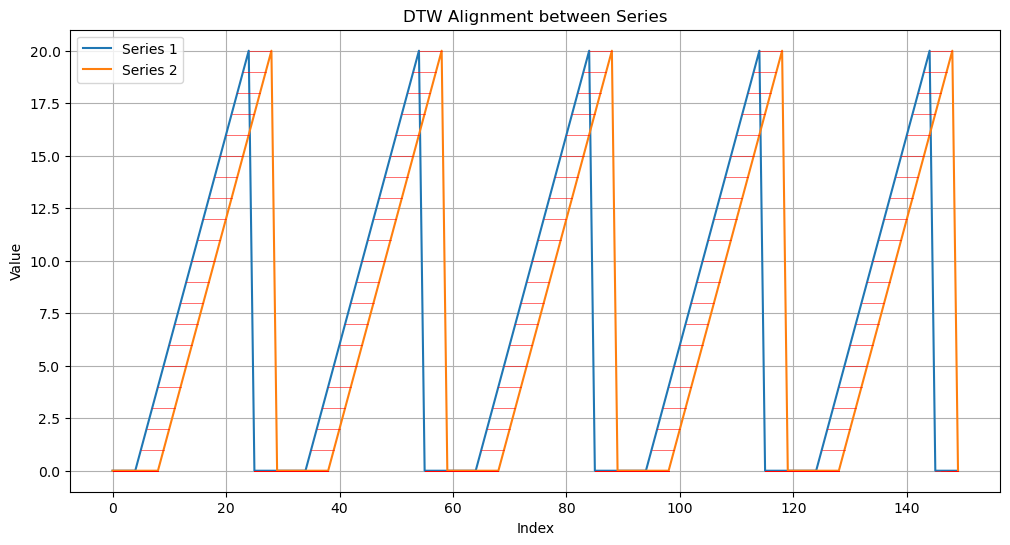

DTW Distance: 0.0
Normalized DTW Distance: 0.0


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

# Create two time series with data 10 times larger
series1 = np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0], 5)
series2 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0],5)

# Pad the shorter series to match the length of the longer series
if len(series1) < len(series2):
    padding = np.full(len(series2) - len(series1), series1[-1])
    series1 = np.concatenate([series1, padding])
elif len(series2) < len(series1):
    padding = np.full(len(series1) - len(series2), series2[-1])
    series2 = np.concatenate([series2, padding])

# Calculate the DTW distance and the path
distance, path = fastdtw(series1, series2)

# Normalize the DTW distance to a range of 0 to 1
max_possible_distance = np.sum(np.abs(series1 - series2))
normalized_distance = distance / max_possible_distance if max_possible_distance != 0 else 0

# Convert the path to a NumPy array for easier handling
path = np.array(path)

# Plot the series
plt.figure(figsize=(12, 6))
plt.plot(series1, label='Series 1')
plt.plot(series2, label='Series 2')

# Plot the connections between matched points with thinner red lines
for (map1, map2) in path:
    plt.plot([map1, map2], [series1[map1], series2[map2]], 'r', linewidth=0.4)

plt.title('DTW Alignment between Series')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("DTW Distance:", distance)
print("Normalized DTW Distance:", normalized_distance)


Length of series1: 110
Length of series2: 130
Length of series1: 130
Length of series2: 130


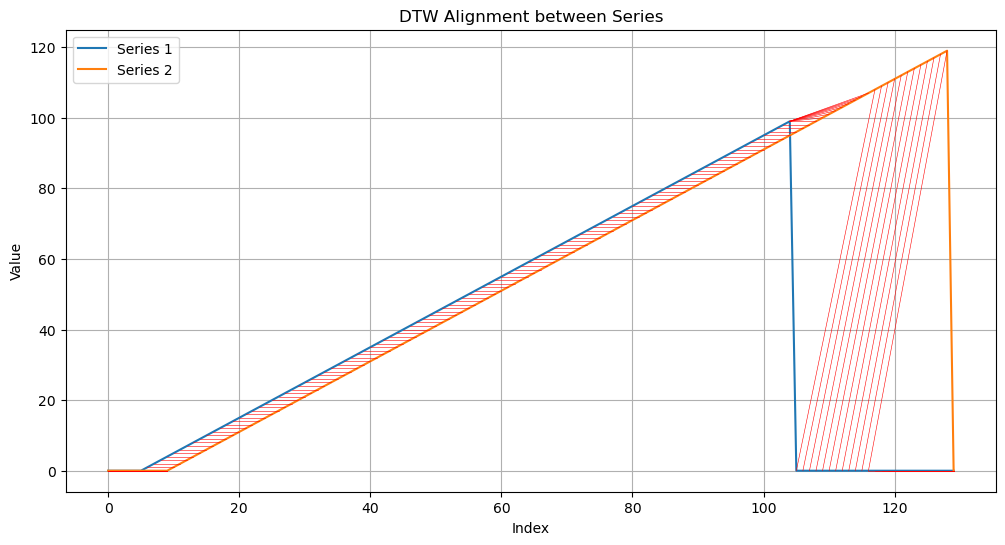

DTW Distance: 1398.0
Normalized DTW Distance: 0.4707070707070707


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

def print_series_info(series1, series2):
    print(f"Length of series1: {len(series1)}")
    print(f"Length of series2: {len(series2)}")

# Create two time series with data 6 times larger
series1 = np.concatenate([np.zeros(5), np.arange(100), np.zeros(5)])
series2 = np.concatenate([np.zeros(9), np.arange(120), np.zeros(1)])

print_series_info(series1, series2)

# Pad the shorter series to match the length of the longer series
if len(series1) < len(series2):
    padding = np.full(len(series2) - len(series1), series1[-1])
    series1 = np.concatenate([series1, padding])
elif len(series2) < len(series1):
    padding = np.full(len(series1) - len(series2), series2[-1])
    series2 = np.concatenate([series2, padding])

print_series_info(series1, series2)

# Calculate the DTW distance and the path
distance, path = fastdtw(series1, series2)

# Normalize the DTW distance to a range of 0 to 1
max_possible_distance = np.sum(np.abs(series1 - series2))
normalized_distance = distance / max_possible_distance if max_possible_distance != 0 else 0

# Convert the path to a NumPy array for easier handling
path = np.array(path)

# Plot the series
plt.figure(figsize=(12, 6))
plt.plot(series1, label='Series 1')
plt.plot(series2, label='Series 2')

# Plot the connections between matched points with thinner red lines
for (map1, map2) in path:
    plt.plot([map1, map2], [series1[map1], series2[map2]], 'r', linewidth=0.4)

plt.title('DTW Alignment between Series')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("DTW Distance:", distance)
print("Normalized DTW Distance:", normalized_distance)


DTW Distance for series pair 0: 0.2
Normalized DTW Distance for series pair 0: 1.0
DTW Distance for series pair 1: 0.1
Normalized DTW Distance for series pair 1: 0.0006752194463200541
Total DTW Distance for all pairs: 0.30000000000000004
Normalized Total DTW Distance for all pairs: 0.002022926500337155
Series pair 0:
Series 1: [ 0  0  0  0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20  0  0  0  0  0]
Series 2: [ 0.   0.   0.   0.   0.2  1.   2.   3.   4.   5.   6.   7.   8.   9.
 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.   0.   0.   0.
  0.   0. ]


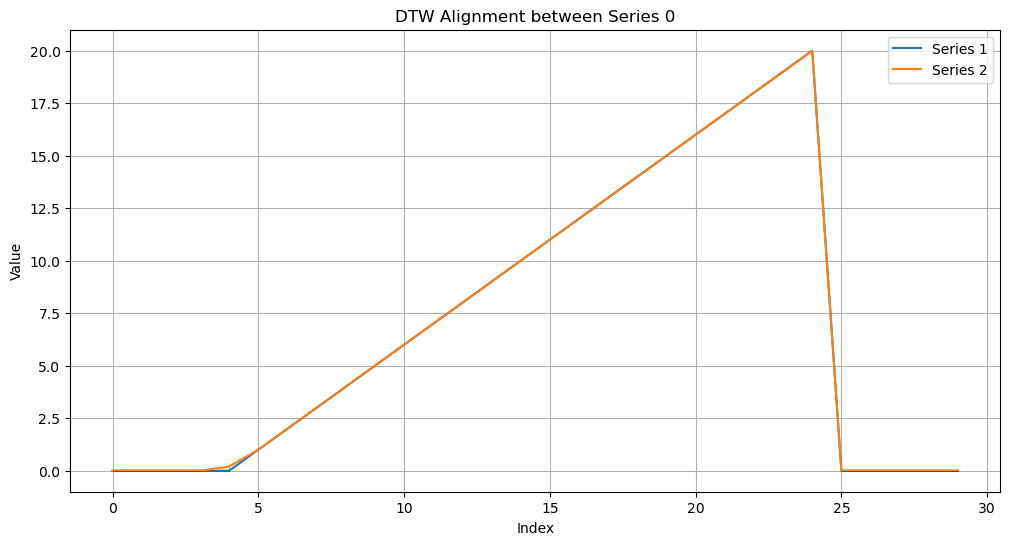

Series pair 1:
Series 1: [ 0.   0.   0.   0.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.
 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.   0.   0.   0.
  0.   0.1]
Series 2: [ 0  0  0  0  0  0  0  0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20  0]


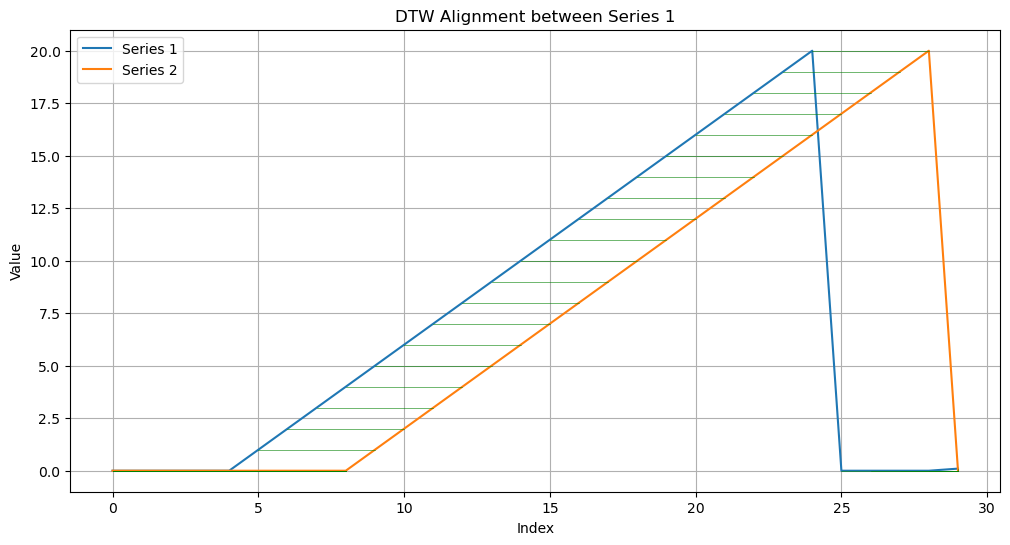

Individual DTW Distances: [0.2, 0.1]
Individual Normalized DTW Distances: [1.0, 0.0006752194463200541]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

def compute_padded_dtw(series_a, series_b):
    # Pad the shorter series to match the length of the longer series
    if len(series_a) < len(series_b):
        padding = np.full(len(series_b) - len(series_a), series_a[-1])
        series_a = np.concatenate([series_a, padding])
    elif len(series_b) < len(series_a):
        padding = np.full(len(series_a) - len(series_b), series_b[-1])
        series_b = np.concatenate([series_b, padding])
    
    # Calculate the DTW distance
    distance, path = fastdtw(series_a, series_b)
    
    return distance, path, series_a, series_b

def plot_dtw_alignment(series_a, series_b, path, index):
    plt.figure(figsize=(12, 6))
    plt.plot(series_a, label='Series 1')
    plt.plot(series_b, label='Series 2')

    # Plot the connections between matched points with thinner green lines
    for (map1, map2) in path:
        plt.plot([map1, map2], [series_a[map1], series_b[map2]], 'g', linewidth=0.4)

    plt.title(f'DTW Alignment between Series {index}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define your series groups
series_groups = [
    (np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0], 1),
     np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0], 1)),
    (np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0.1], 1),
     np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0], 1))
]

# Compute DTW distances for each pair and aggregate them
total_distance = 0
all_distances = []
normalized_distances = []
paths = []
padded_series = []

for i, (series_a, series_b) in enumerate(series_groups):
    distance, path, padded_series_a, padded_series_b = compute_padded_dtw(series_a, series_b)
    total_distance += distance
    all_distances.append(distance)
    paths.append(path)
    padded_series.append((padded_series_a, padded_series_b))
    print(f"DTW Distance for series pair {i}: {distance}")
    
    # Calculate normalized distance for each pair
    max_possible_distance = np.sum(np.abs(padded_series_a - padded_series_b))
    normalized_distance = distance / max_possible_distance if max_possible_distance != 0 else 0
    normalized_distances.append(normalized_distance)
    print(f"Normalized DTW Distance for series pair {i}: {normalized_distance}")

print("Total DTW Distance for all pairs:", total_distance)

# Optionally, normalize the total distance using the padded series
overall_max_possible_distance = sum(np.sum(np.abs(series_a - series_b)) for series_a, series_b in padded_series)
normalized_total_distance = total_distance / overall_max_possible_distance if overall_max_possible_distance != 0 else 0
print("Normalized Total DTW Distance for all pairs:", normalized_total_distance)

# Plotting the series and DTW paths for each pair
for i, ((series_a, series_b), path) in enumerate(zip(padded_series, paths)):
    print(f"Series pair {i}:")
    print(f"Series 1: {series_a}")
    print(f"Series 2: {series_b}")
    plot_dtw_alignment(series_a, series_b, path, i)

print("Individual DTW Distances:", all_distances)
print("Individual Normalized DTW Distances:", normalized_distances)


### dtaidistance

DTW Distance for series pair 0: 4.47213595499958
Normalized DTW Distance for series pair 0: 0.0298142396999972
DTW Distance for series pair 1: 0.9
Normalized DTW Distance for series pair 1: 0.006044325050369375
Total DTW Distance for all pairs: 5.37213595499958
Normalized Total DTW Distance for all pairs: 0.017973020926729946


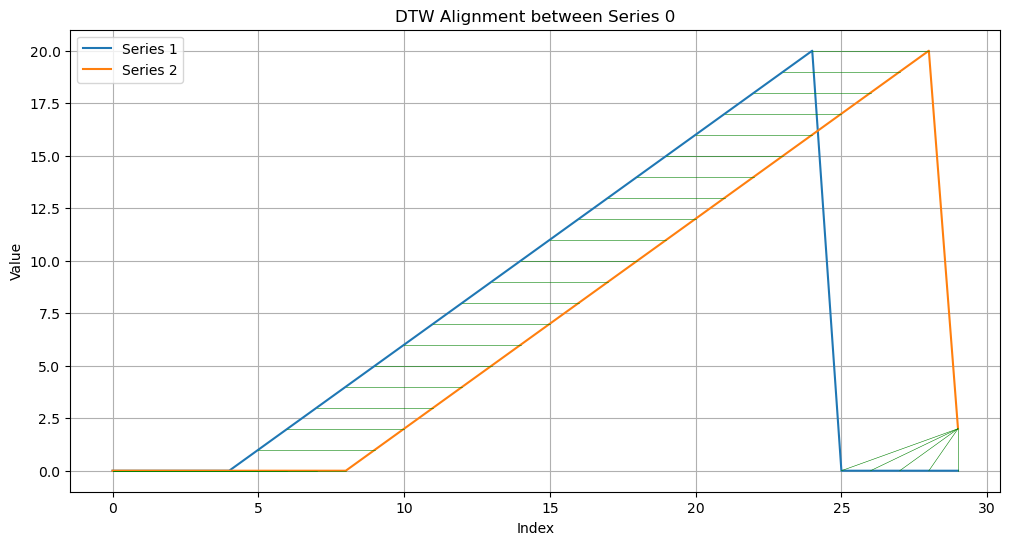

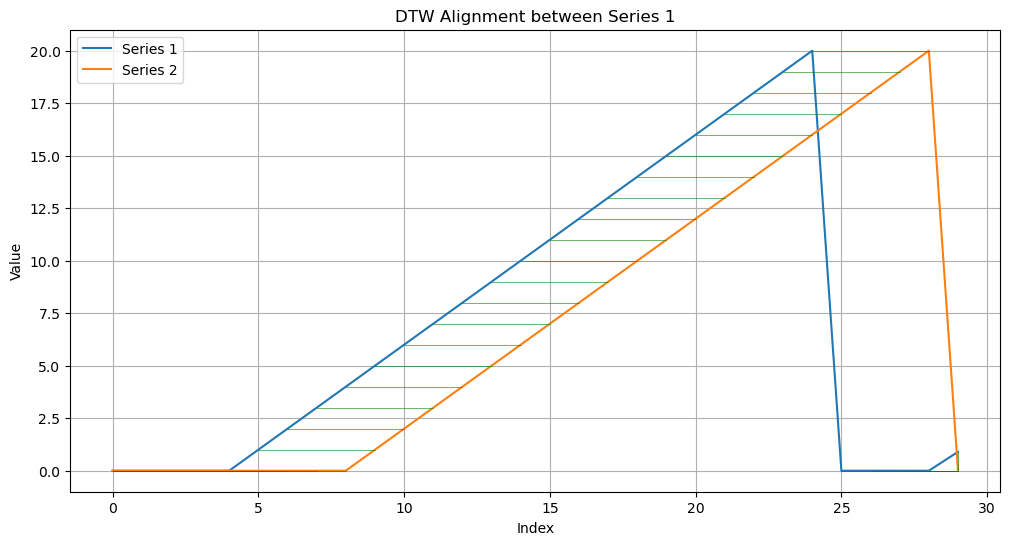

Individual DTW Distances: [4.47213595499958, 0.9]
Individual Normalized DTW Distances: [0.0298142396999972, 0.006044325050369375]


In [98]:
import numpy as np
import matplotlib.pyplot as plt
from dtaidistance import dtw

def compute_padded_dtw(series_a, series_b):
    # Pad the shorter series to match the length of the longer series
    if len(series_a) < len(series_b):
        padding = np.full(len(series_b) - len(series_a), series_a[-1])
        series_a = np.concatenate([series_a, padding])
    elif len(series_b) < len(series_a):
        padding = np.full(len(series_a) - len(series_b), series_b[-1])
        series_b = np.concatenate([series_b, padding])
    
    # Calculate the DTW distance and the path
    distance = dtw.distance(series_a, series_b)
    path = dtw.warping_path(series_a, series_b)
    
    return distance, path, series_a, series_b

def plot_dtw_alignment(series_a, series_b, path, index):
    plt.figure(figsize=(12, 6))
    plt.plot(series_a, label='Series 1')
    plt.plot(series_b, label='Series 2')

    # Plot the connections between matched points with thinner green lines
    for (map1, map2) in path:
        plt.plot([map1, map2], [series_a[map1], series_b[map2]], 'g', linewidth=0.4)

    plt.title(f'DTW Alignment between Series {index}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define your series groups
series_groups = [
    (np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0], 1),
     np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2], 1)),
    (np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0.9], 1),
     np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0], 1))
]

# Compute DTW distances for each pair and aggregate them
total_distance = 0
all_distances = []
normalized_distances = []
paths = []
padded_series = []

for i, (series_a, series_b) in enumerate(series_groups):
    distance, path, padded_series_a, padded_series_b = compute_padded_dtw(series_a, series_b)
    total_distance += distance
    all_distances.append(distance)
    paths.append(path)
    padded_series.append((padded_series_a, padded_series_b))
    print(f"DTW Distance for series pair {i}: {distance}")
    
    # Calculate normalized distance for each pair
    max_possible_distance = np.sum(np.abs(padded_series_a - padded_series_b))
    normalized_distance = distance / max_possible_distance if max_possible_distance != 0 else 0
    normalized_distances.append(normalized_distance)
    print(f"Normalized DTW Distance for series pair {i}: {normalized_distance}")

print("Total DTW Distance for all pairs:", total_distance)

# Optionally, normalize the total distance using the padded series
overall_max_possible_distance = sum(np.sum(np.abs(series_a - series_b)) for series_a, series_b in padded_series)
normalized_total_distance = total_distance / overall_max_possible_distance if overall_max_possible_distance != 0 else 0
print("Normalized Total DTW Distance for all pairs:", normalized_total_distance)

# Plotting the series and DTW paths for each pair
for i, ((series_a, series_b), path) in enumerate(zip(padded_series, paths)):
    plot_dtw_alignment(series_a, series_b, path, i)

print("Individual DTW Distances:", all_distances)
print("Individual Normalized DTW Distances:", normalized_distances)


## Endpoints and MotionLogData similarity metrics (No padding and normalization) (V1)

DTW Distance for series pair 0: 0.8899999999999999
DTW Distance for series pair 1: 2.960000000000001
DTW Distance for series pair 2: 0.6698729800000001
Total DTW Distance for all pairs: 4.519872980000001


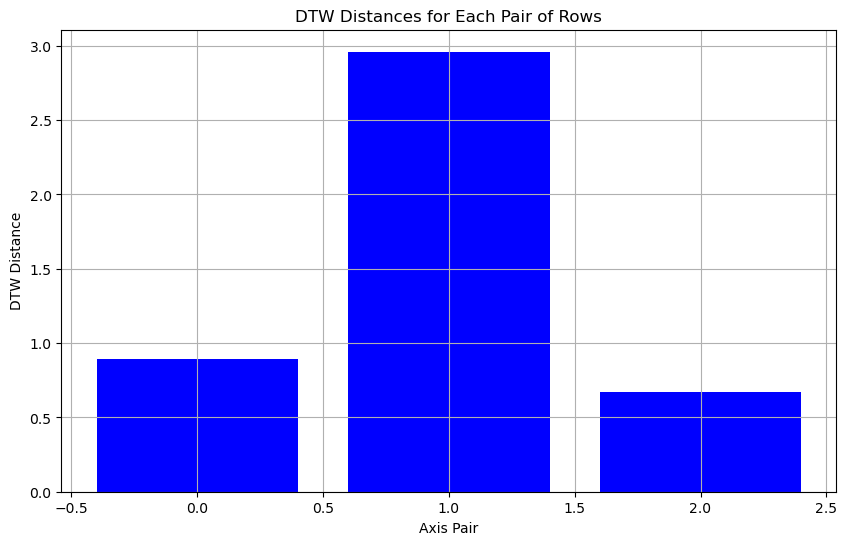

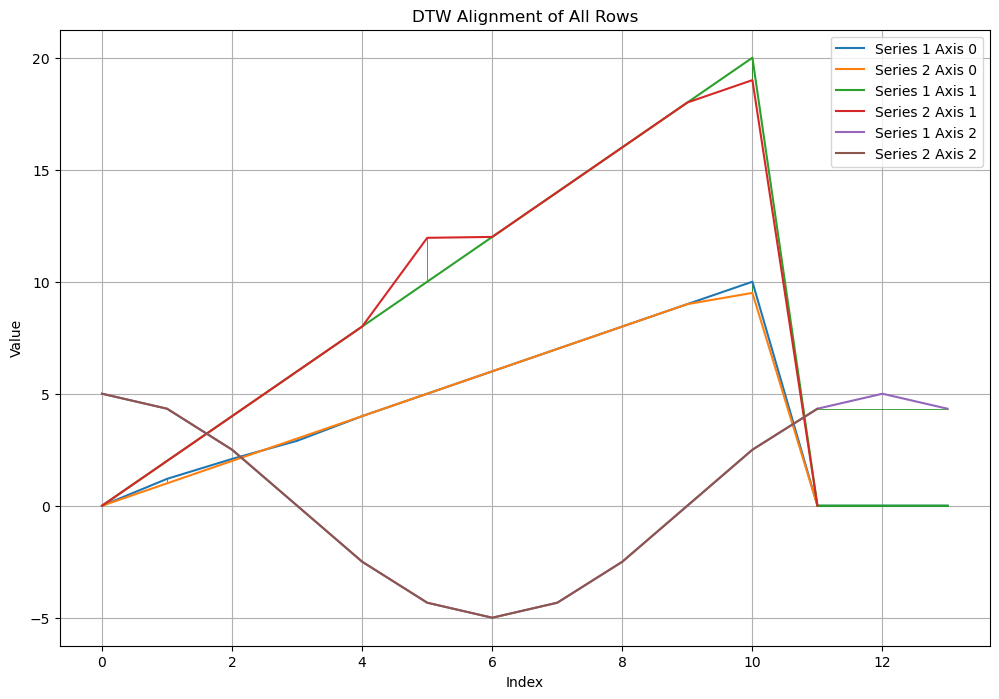

Series pair 0:
Series 1: [ 0.    1.2   2.09  2.9   4.    5.    6.    7.    8.    9.   10.    0.
  0.    0.  ]
Series 2: [0.  1.  2.  3.  4.  5.  6.  7.  8.  9.  9.5 0. ]


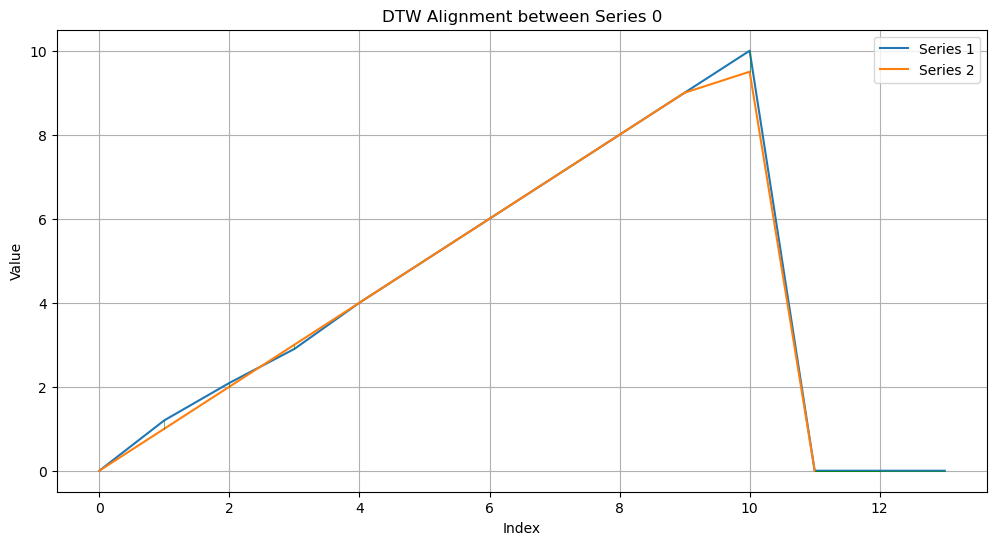

Series pair 1:
Series 1: [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.  0.  0.  0.]
Series 2: [ 0.    2.    4.    6.    8.   11.96 12.   14.   16.   18.   19.    0.  ]


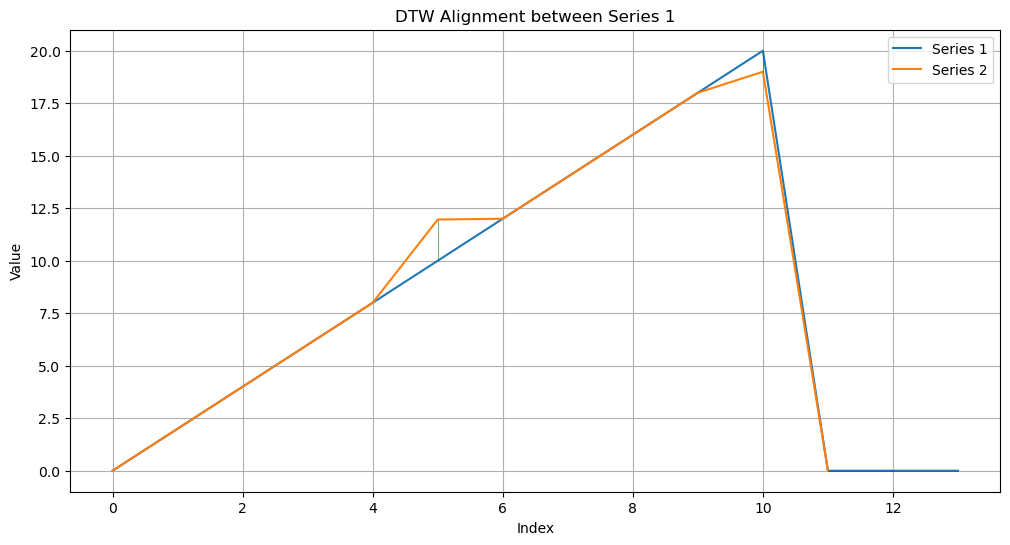

Series pair 2:
Series 1: [ 5.          4.33012702  2.5         0.         -2.5        -4.33012702
 -5.         -4.33012702 -2.5         0.          2.5         4.33012702
  5.          4.33012702]
Series 2: [ 5.          4.33012702  2.5         0.         -2.5        -4.33012702
 -5.         -4.33012702 -2.5         0.          2.5         4.33012702]


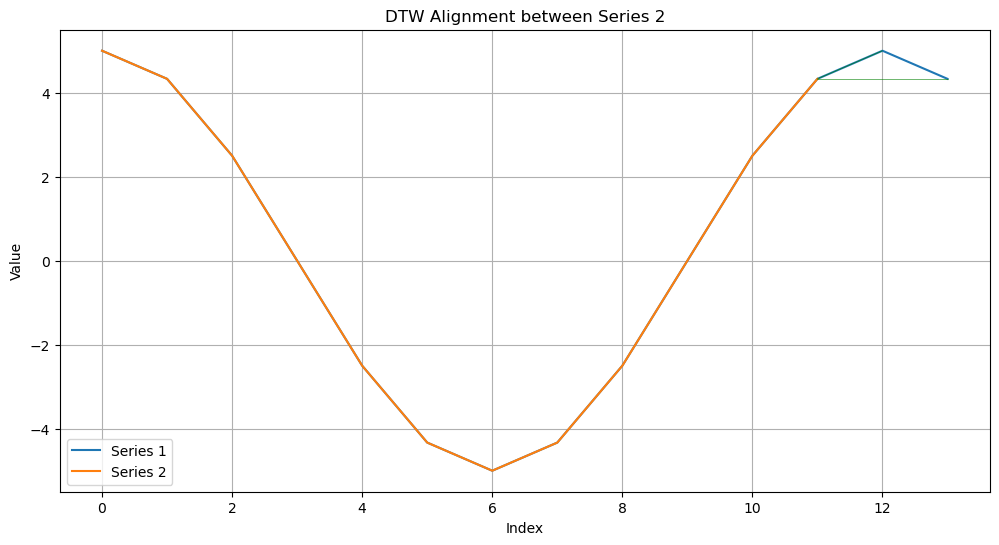

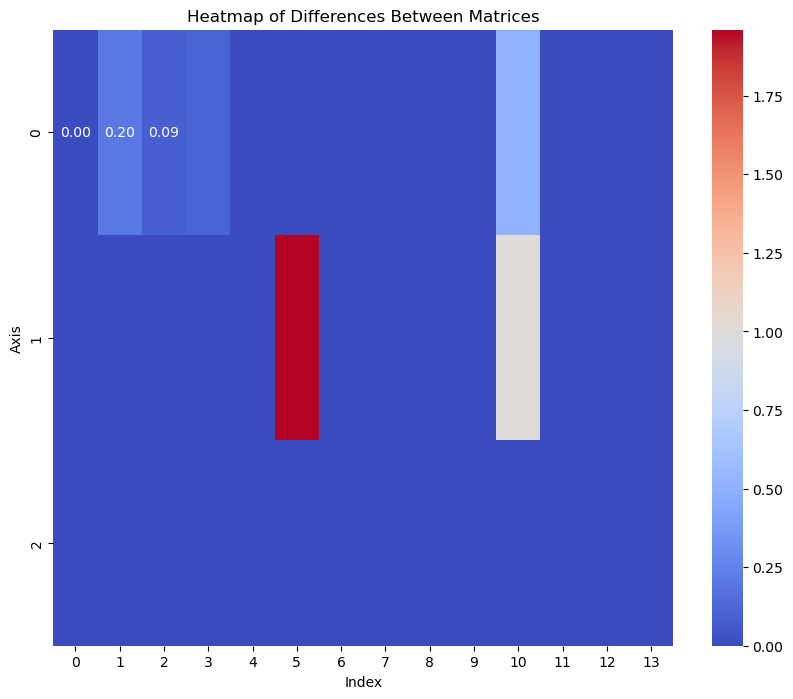

Individual DTW Distances: [0.8899999999999999, 2.960000000000001, 0.6698729800000001]
Total DTW Distance: 4.519872980000001
Endpoints Match: Yes


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fastdtw import fastdtw

def compute_dtw(series_a, series_b):
    # Calculate the DTW distance
    distance, path = fastdtw(series_a, series_b)
    return distance, path

def plot_dtw_alignment(series_a, series_b, path, index):
    plt.figure(figsize=(12, 6))
    plt.plot(series_a, label='Series 1')
    plt.plot(series_b, label='Series 2')

    # Plot the connections between matched points with thinner green lines
    for (map1, map2) in path:
        plt.plot([map1, map2], [series_a[map1], series_b[map2]], 'g', linewidth=0.4)

    plt.title(f'DTW Alignment between Series {index}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_heatmap(matrix1, matrix2):
    # Calculate the difference matrix
    diff_matrix = np.zeros((matrix1.shape[0], max(matrix1.shape[1], matrix2.shape[1])), dtype=float)
    for i in range(matrix1.shape[0]):
        length = min(len(matrix1[i]), len(matrix2[i]))
        diff_matrix[i, :length] = np.abs(matrix1[i, :length] - matrix2[i, :length])

    plt.figure(figsize=(10, 8))
    sns.heatmap(diff_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap of Differences Between Matrices')
    plt.xlabel('Index')
    plt.ylabel('Axis')
    plt.show()

def plot_dtw_distances(distances):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(distances)), distances, color='blue')
    plt.xlabel('Axis Pair')
    plt.ylabel('DTW Distance')
    plt.title('DTW Distances for Each Pair of Rows')
    plt.grid(True)
    plt.show()

def plot_all_dtw_alignments(matrix1, matrix2, paths):
    plt.figure(figsize=(12, 8))
    for i, (series_a, series_b, path) in enumerate(zip(matrix1, matrix2, paths)):
        for (map1, map2) in path:
            plt.plot([map1, map2], [series_a[map1], series_b[map2]], 'g', linewidth=0.5)
        plt.plot(series_a, label=f'Series 1 Axis {i}')
        plt.plot(series_b, label=f'Series 2 Axis {i}')
    plt.title('DTW Alignment of All Rows')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_dtw(matrix1, matrix2):
    assert matrix1.shape[0] == matrix2.shape[0], "Matrices must have the same number of rows"
    
    total_distance = 0
    all_distances = []
    paths = []
    endpoints_match = True

    for i in range(matrix1.shape[0]):
        series_a = matrix1[i]
        series_b = matrix2[i]
        distance, path = compute_dtw(series_a, series_b)
        total_distance += distance
        all_distances.append(distance)
        paths.append(path)
        print(f"DTW Distance for series pair {i}: {distance}")
        
        # Check if endpoints match
        if abs(series_a[-1] - series_b[-1]) >= 0.001:
            endpoints_match = False

    print("Total DTW Distance for all pairs:", total_distance)

    # Plot DTW distances
    plot_dtw_distances(all_distances)

    # Plot all DTW alignments in one plot
    plot_all_dtw_alignments(matrix1, matrix2, paths)

    # Plotting the series and DTW paths for each pair
    for i, (series_a, series_b, path) in enumerate(zip(matrix1, matrix2, paths)):
        print(f"Series pair {i}:")
        print(f"Series 1: {series_a}")
        print(f"Series 2: {series_b}")
        plot_dtw_alignment(series_a, series_b, path, i)

    # Plot heatmap of differences
    plot_heatmap(matrix1, matrix2)

    print("Individual DTW Distances:", all_distances)
    return total_distance, "Yes" if endpoints_match else "No"

# Example usage
# Create two matrices of log data with slight differences
matrix1 = np.array([
    [ 0, 1.2, 2.09, 2.9, 4, 5, 6, 7, 8, 9, 10, 0, 0, 0 ],
    [ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 0, 0, 0 ],
    [ 5.0, 4.33012702, 2.5, 0.0, -2.5, -4.33012702, -5.0, -4.33012702, -2.5, 0.0, 2.5, 4.33012702, 5.0, 4.33012702 ]
])

matrix2 = np.array([
    [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9.5, 0 ],
    [ 0, 2, 4, 6, 8, 11.96, 12, 14, 16, 18, 19, 0 ],
    [ 5.0, 4.33012702, 2.5, 0.0, -2.5, -4.33012702, -5.0, -4.33012702, -2.5, 0.0, 2.5, 4.33012702 ]
])

total_distance, endpoints_match = analyze_dtw(matrix1, matrix2)
print("Total DTW Distance:", total_distance)
print("Endpoints Match:", endpoints_match)


## APILogs - Similarity 

In [108]:
from difflib import SequenceMatcher
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def sequence_similarity(series_a, series_b):
    # Calculate similarity ratio using SequenceMatcher
    seq_matcher = SequenceMatcher(None, series_a, series_b)
    similarity_ratio = seq_matcher.ratio()
    return similarity_ratio

def bleu_score(series_a, series_b):
    # Tokenize sequences into characters for finer granularity
    references = [list(' '.join(series_a))]
    predictions = list(' '.join(series_b))
    
    # Calculate BLEU score using NLTK with custom weights
    smooth_fn = SmoothingFunction().method1
    weights = (0.25, 0.25, 0.25, 0.25)
    bleu = sentence_bleu(references, predictions, weights=weights, smoothing_function=smooth_fn)
    return bleu

def analyze_sequence_similarity(series_a, series_b):
    similarity_ratio = sequence_similarity(series_a, series_b)
    bleu = bleu_score(series_a, series_b)

    # Output the results
    print(f"Series 1: {series_a}")
    print(f"Series 2: {series_b}")
    print(f"Similarity Ratio: {similarity_ratio}")
    print(f"BLEU Score: {bleu}")

    return similarity_ratio, bleu

# Example usage
# Define two series of API strings
series_a = ["GET /api/user", "POST /api/user", "GET /api/user/1", "DELETE /api/user/1"]
series_b = ["GET /api/user", "POST /api/user", "GET /api/user/1234", "DELETE /api/user/1"]

similarity_ratio, bleu = analyze_sequence_similarity(series_a, series_b)
print("Similarity Ratio:", similarity_ratio)
print("BLEU Score:", bleu)

# Another example
series_b = ["GET /api/user1", "POST /api/user", "GET /api/user/1", "DELETE /api/user/1"]

similarity_ratio, bleu = analyze_sequence_similarity(series_a, series_b)
print("Similarity Ratio:", similarity_ratio)
print("BLEU Score:", bleu)


Series 1: ['GET /api/user', 'POST /api/user', 'GET /api/user/1', 'DELETE /api/user/1']
Series 2: ['GET /api/user', 'POST /api/user', 'GET /api/user/1234', 'DELETE /api/user/1']
Similarity Ratio: 0.75
BLEU Score: 0.9297257490286697
Similarity Ratio: 0.75
BLEU Score: 0.9297257490286697
Series 1: ['GET /api/user', 'POST /api/user', 'GET /api/user/1', 'DELETE /api/user/1']
Series 2: ['GET /api/user1', 'POST /api/user', 'GET /api/user/1', 'DELETE /api/user/1']
Similarity Ratio: 0.75
BLEU Score: 0.9594863506034305
Similarity Ratio: 0.75
BLEU Score: 0.9594863506034305


## Pass@k metric

In [25]:
import numpy as np
from itertools import repeat
from typing import List

def estimator(n: int, c: int, k: int) -> float:
    """
    Calculates 1 - comb(n - c, k) / comb(n, k).
    """
    if n - c < k:
        return 1.0
    return 1.0 - np.prod(1.0 - k / np.arange(n - c + 1, n + 1))

def pass_at_k(problems: List[int], completions: List[int], k: int) -> float:
    """
    Calculates the pass@k metric.

    Parameters:
    problems (List[int]): List of the number of possible solutions for each problem.
    completions (List[int]): List of the number of correct solutions for each problem.
    k (int): Number of top attempts considered.

    Returns:
    float: pass@k value.
    """
    assert len(problems) == len(completions), "Length of problems and completions must be equal"
    
    # Calculate the pass@k for each problem using the estimator
    pass_counts = [estimator(n, c, k) for n, c in zip(problems, completions)]
    
    # Calculate the average pass@k
    return np.mean(pass_counts)

# Example usage
# problems = [10, 10, 10, 10]  # Number of possible solutions for each problem
# completions = [5, 5, 3, 3]   # Number of correct solutions for each problem

problems = [5]  # Number of possible solutions for each problem
completions = [4]   # Number of correct solutions for each problem
k = 1

pass_at_k_value = pass_at_k(problems, completions, k)
print(f"pass@{k} = {pass_at_k_value}")


pass@1 = 0.8


# Real files metrics

### DTW

Matrix 1:
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.
    1.   1.   1.   2.   2.   2.   2.   2.   3.   3.   3.   3.   4.   4.
    4.   5.   5.   5.   5.   6.   6.   6.   7.   7.   8.   8.   8.   9.
    9.  10.  10.  11.  11.  12.  12.  13.  13.  14.  14.  15.  15.  16.
   16.  17.  17.  18.  19.  19.  20.  20.  21.  22.  22.  23.  24.  25.
   25.  26.  27.  27.  28.  29.  30.  30.  31.  32.  33.  34.  34.  35.
   36.  37.  38.  39.  40.  41.  41.  42.  43.  44.  45.  46.  47.  48.
   49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.
   63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.
   77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.
   91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104.
  105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
  119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132.
  133. 134. 135. 136. 137. 138. 139. 140. 140. 141. 14

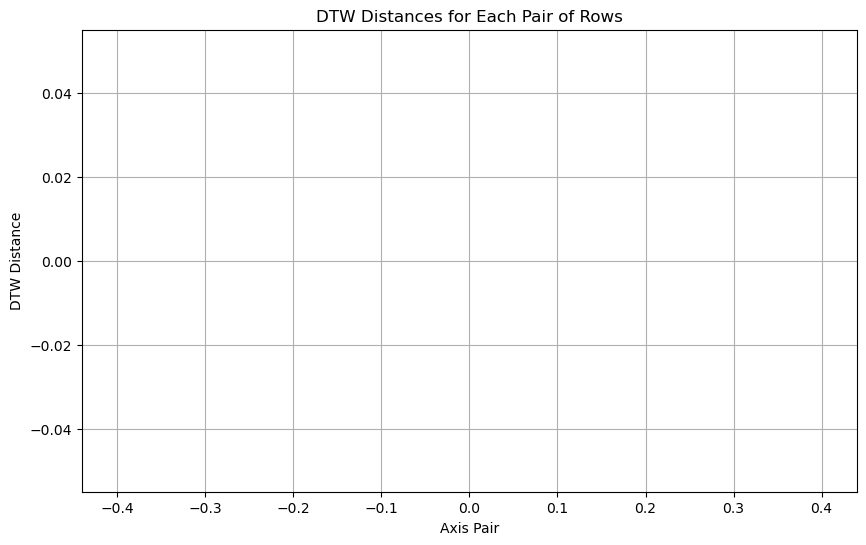

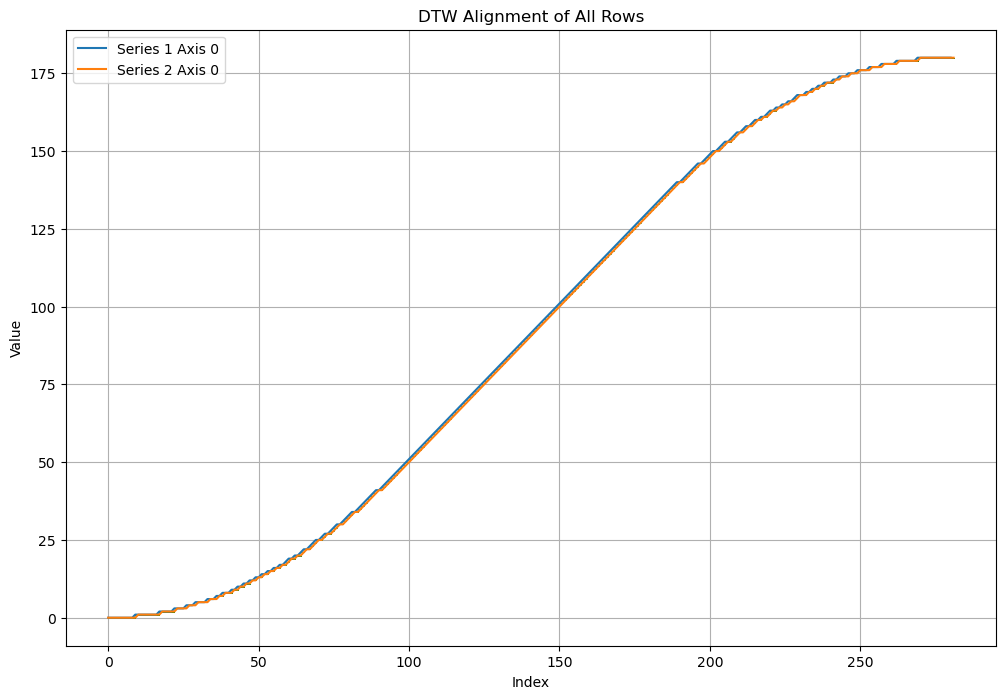

Series pair 0:
Series 1: [  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   1.   1.   1.
   1.   1.   1.   2.   2.   2.   2.   2.   3.   3.   3.   3.   4.   4.
   4.   5.   5.   5.   5.   6.   6.   6.   7.   7.   8.   8.   8.   9.
   9.  10.  10.  11.  11.  12.  12.  13.  13.  14.  14.  15.  15.  16.
  16.  17.  17.  18.  19.  19.  20.  20.  21.  22.  22.  23.  24.  25.
  25.  26.  27.  27.  28.  29.  30.  30.  31.  32.  33.  34.  34.  35.
  36.  37.  38.  39.  40.  41.  41.  42.  43.  44.  45.  46.  47.  48.
  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.
  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.
  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.
  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132.
 133. 134. 135. 136. 137. 138. 139. 140. 140. 141. 1

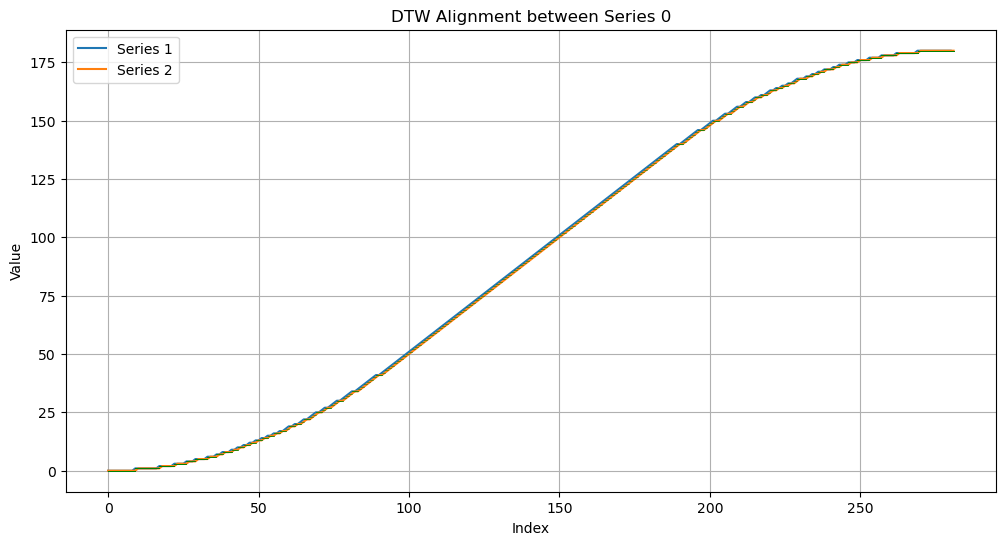

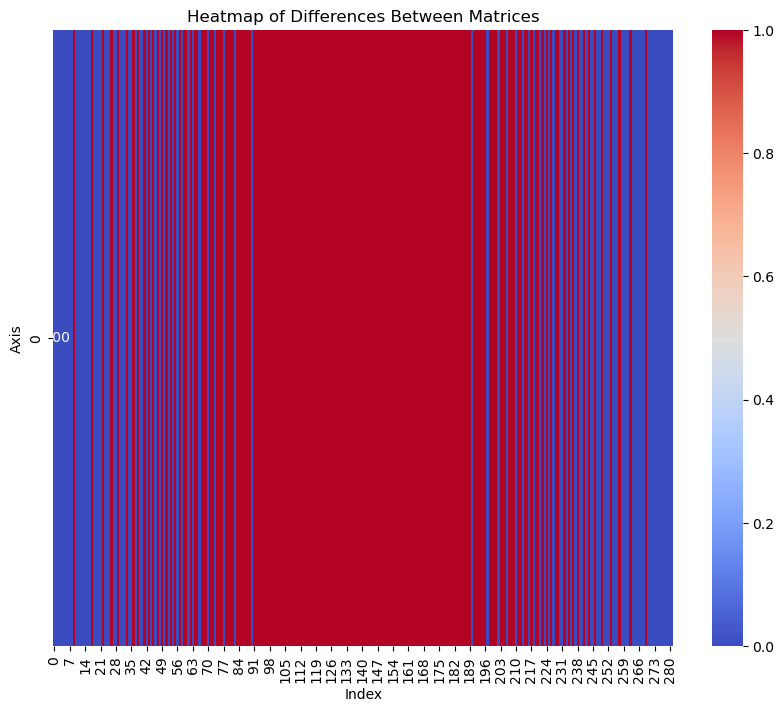

Individual DTW Distances: [0.0]
Total DTW Distance: 0.0
Endpoints Match: Yes


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fastdtw import fastdtw

def parse_log_file(file_path):
    data = {}
    with open(file_path, 'r') as file:
        headers = file.readline().strip().split('\t')
        for header in headers[1:]:
            data[header] = []
        
        for line in file:
            values = line.strip().split('\t')
            for i, header in enumerate(headers[1:], start=1):
                data[header].append(float(values[i]))
    
    return data

def create_matrix_from_data(data):
    return np.array([data[key] for key in sorted(data.keys())])

def compute_dtw(series_a, series_b):
    distance, path = fastdtw(series_a, series_b)
    return distance, path

def plot_dtw_alignment(series_a, series_b, path, index):
    plt.figure(figsize=(12, 6))
    plt.plot(series_a, label='Series 1')
    plt.plot(series_b, label='Series 2')

    for (map1, map2) in path:
        plt.plot([map1, map2], [series_a[map1], series_b[map2]], 'g', linewidth=0.4)

    plt.title(f'DTW Alignment between Series {index}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_heatmap(matrix1, matrix2):
    diff_matrix = np.zeros((matrix1.shape[0], max(matrix1.shape[1], matrix2.shape[1])), dtype=float)
    for i in range(matrix1.shape[0]):
        length = min(len(matrix1[i]), len(matrix2[i]))
        diff_matrix[i, :length] = np.abs(matrix1[i, :length] - matrix2[i, :length])

    plt.figure(figsize=(10, 8))
    sns.heatmap(diff_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap of Differences Between Matrices')
    plt.xlabel('Index')
    plt.ylabel('Axis')
    plt.show()

def plot_dtw_distances(distances):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(distances)), distances, color='blue')
    plt.xlabel('Axis Pair')
    plt.ylabel('DTW Distance')
    plt.title('DTW Distances for Each Pair of Rows')
    plt.grid(True)
    plt.show()

def plot_all_dtw_alignments(matrix1, matrix2, paths):
    plt.figure(figsize=(12, 8))
    for i, (series_a, series_b, path) in enumerate(zip(matrix1, matrix2, paths)):
        for (map1, map2) in path:
            plt.plot([map1, map2], [series_a[map1], series_b[map2]], 'g', linewidth=0.5)
        plt.plot(series_a, label=f'Series 1 Axis {i}')
        plt.plot(series_b, label=f'Series 2 Axis {i}')
    plt.title('DTW Alignment of All Rows')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_dtw(matrix1, matrix2):
    assert matrix1.shape[0] == matrix2.shape[0], "Matrices must have the same number of rows"
    
    total_distance = 0
    all_distances = []
    paths = []
    endpoints_match = True

    for i in range(matrix1.shape[0]):
        series_a = matrix1[i]
        series_b = matrix2[i]
        distance, path = compute_dtw(series_a, series_b)
        total_distance += distance
        all_distances.append(distance)
        paths.append(path)
        print(f"DTW Distance for series pair {i}: {distance}")
        
        # Print path details to troubleshoot
        print(f"DTW Path for series pair {i}: {path}")
        for (map1, map2) in path:
            print(f"Aligned points: ({map1}, {map2}) -> Values: ({series_a[map1]}, {series_b[map2]})")
        
        if abs(series_a[-1] - series_b[-1]) >= 0.001:
            endpoints_match = False

    print("Total DTW Distance for all pairs:", total_distance)

    plot_dtw_distances(all_distances)
    plot_all_dtw_alignments(matrix1, matrix2, paths)

    for i, (series_a, series_b, path) in enumerate(zip(matrix1, matrix2, paths)):
        print(f"Series pair {i}:")
        print(f"Series 1: {series_a}")
        print(f"Series 2: {series_b}")
        plot_dtw_alignment(series_a, series_b, path, i)

    plot_heatmap(matrix1, matrix2)

    print("Individual DTW Distances:", all_distances)
    return total_distance, "Yes" if endpoints_match else "No"

# Example usage
file1_path = 'mceval_files/1_MCEval_Log.txt'
file2_path = 'mceval_files/1_gpt-4o_Log.txt'

data1 = parse_log_file(file1_path)
data2 = parse_log_file(file2_path)

matrix1 = create_matrix_from_data(data1)
matrix2 = create_matrix_from_data(data2)

print("Matrix 1:")
print(matrix1)
print("\nMatrix 2:")
print(matrix2)

total_distance, endpoints_match = analyze_dtw(matrix1, matrix2)
print("Total DTW Distance:", total_distance)
print("Endpoints Match:", endpoints_match)


### Similarity and BLEU for codes

In [15]:
from difflib import SequenceMatcher
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import pandas as pd

def sequence_similarity(series_a, series_b):
    # Calculate similarity ratio using SequenceMatcher
    seq_matcher = SequenceMatcher(None, series_a, series_b)
    similarity_ratio = seq_matcher.ratio()
    return similarity_ratio

def bleu_score(series_a, series_b):
    # Tokenize sequences into characters for finer granularity
    references = [list(' '.join(series_a))]
    predictions = list(' '.join(series_b))
    
    # Calculate BLEU score using NLTK with custom weights
    smooth_fn = SmoothingFunction().method1
    weights = (0.25, 0.25, 0.25, 0.25)
    bleu = sentence_bleu(references, predictions, weights=weights, smoothing_function=smooth_fn)
    return bleu

def analyze_sequence_similarity(series_a, series_b):
    similarity_ratio = sequence_similarity(series_a, series_b)
    bleu = bleu_score(series_a, series_b)

    # Output the results
    return similarity_ratio, bleu

def read_file_contents(file_path):
    with open(file_path, 'r') as file:
        content = file.readlines()
    return content

# File paths
file_path_1 = 'mceval_files/1_MCEval.py'
file_path_2 = 'mceval_files/1_gpt-3.5-turbo +PE T0.2 1.5.py'

# Reading the contents of the files
content_1 = read_file_contents(file_path_1)
content_2 = read_file_contents(file_path_2)

# Comparing the two files using the metrics
similarity_ratio, bleu = analyze_sequence_similarity(content_1, content_2)

# Display the results
results_df = pd.DataFrame({
    "Similarity Ratio": [similarity_ratio],
    "BLEU Score": [bleu]
})

print(results_df)


   Similarity Ratio  BLEU Score
0          0.980392    0.997422
